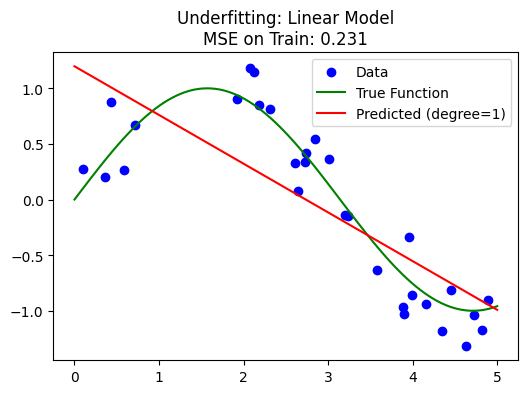

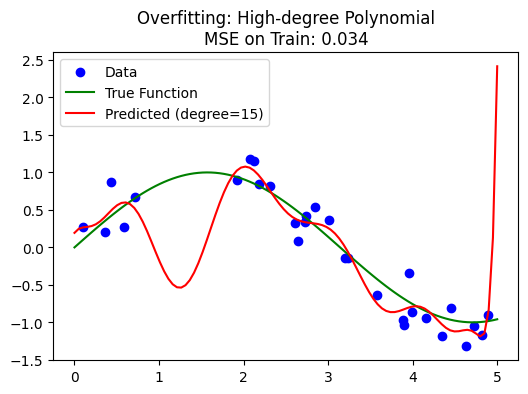

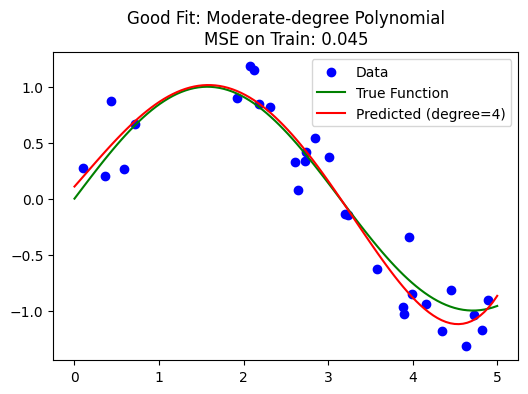

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate non-linear data
np.random.seed(0)
X = np.sort(np.random.rand(30) * 5)[:, np.newaxis]
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Test data for smooth plotting
X_test = np.linspace(0, 5, 100)[:, np.newaxis]

def plot_fit(degree, title):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    y_test_pred = model.predict(X_test_poly)
    
    mse = mean_squared_error(y, y_pred)
    
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X_test, np.sin(X_test), color='green', label='True Function')
    plt.plot(X_test, y_test_pred, color='red', label=f'Predicted (degree={degree})')
    plt.title(f'{title}\nMSE on Train: {mse:.3f}')
    plt.legend()
    plt.show()

# Underfitting: Linear regression (degree=1)
plot_fit(1, "Underfitting: Linear Model")

# Overfitting: High-degree polynomial (degree=15)
plot_fit(15, "Overfitting: High-degree Polynomial")

# Good Fit: Moderate polynomial (degree=4)
plot_fit(4, "Good Fit: Moderate-degree Polynomial")
